تم العثور على 1 وجه
Gender : Male
Age Range : (20, 25)


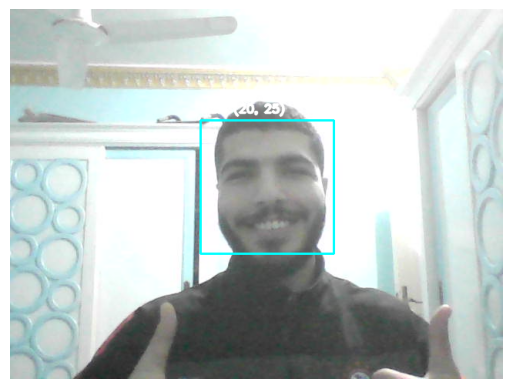

In [1]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture(0)
cap.set(3, 480)  # width
cap.set(4, 640)  # height
model_mean_values = (78.4263377603, 87.7689143744, 114.895847746)
age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)','(20, 25)' ,'(25, 32)', '(33, 43)', '(44, 53)', '(54, 60)']
gender_list = ['Male', 'Female']

def initialize_caffe_models():
    age_net = cv2.dnn.readNetFromCaffe('age_deploy.prototxt', 'age_net.caffemodel')
    gender_net = cv2.dnn.readNetFromCaffe('gender_deploy.prototxt', 'gender_net.caffemodel')
    return age_net, gender_net

def read_from_camera(age_net, gender_net):
    font = cv2.FONT_HERSHEY_SIMPLEX
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
    
    ret, image = cap.read()
    if not ret:
        print("فشل في قراءة الصورة من الكاميرا")
        return
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    
    if len(faces) > 0:
        print("تم العثور على {} وجه".format(str(len(faces))))
    
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 255, 0), 2)
        face_img = image[y:y + h, x:x + w].copy()
        blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), model_mean_values, swapRB=False)
        
        # predict gender
        gender_net.setInput(blob)
        gender_pred = gender_net.forward()
        gender = gender_list[gender_pred[0].argmax()]
        print("Gender : " + gender)
        
        # predict age
        age_net.setInput(blob)
        age_pred = age_net.forward()
        age = age_list[age_pred[0].argmax()]
        print("Age Range : " + age)
        
        overlay_text = "%s %s" % (gender, age)
        cv2.putText(image, overlay_text, (x, y - 10), font, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    
    # عرض الصورة باستخدام matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # إخفاء المحاور
    plt.show()
    
    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    age_net, gender_net = initialize_caffe_models()
    read_from_camera(age_net, gender_net)

